In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\RequirePackage[libertine]{newtxmath}']
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc

from cycler import cycler

mpl.rcParams['ps.usedistiller'] = 'xpdf' 
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

In [2]:
# Replace this variable accordingly 
path_to_results = "../experiments/2019-11-23-00-07_StreamEstimatorPerformance_/"

In [3]:
masterdata = pd.read_csv(path_to_results + "StreamEstimatorPerformance.csv")

In [4]:
masterdata["niter"] = [x.split("||")[0].split("-")[1] for x in masterdata["estimatorId"]]
masterdata["window"] = [x.split("||")[1].split("-")[0] for x in masterdata["estimatorId"]]
masterdata["step"] = [x.split("||")[1].split("-")[1] for x in masterdata["estimatorId"]]
masterdata["stream"] = [x.split("||")[1].split("-")[-1] for x in masterdata["estimatorId"]]

In [5]:
masterdata["niter"] = masterdata["niter"].astype(int)
masterdata["step"] = masterdata["step"].astype(int)
masterdata["stream"] = masterdata["stream"].astype(int)

In [6]:
masterdata.tail()

,estimatorId,cpu,wall,abserror,absmeansqerror,absspeedup,relerror,relmeansqerror,relspeedup,path,rep,niter,window,step,stream
3695,MWP-500-0||1000-1-0.99-0,2.024294e+07,2.067446e+07,0.000929,0.000001,0.790262,0.000000,0.000000,1.000000,data/MWP-500-0||1000-1-0.99-0,9,500,1000,1,0
3696,MWP-500-0||1000-1-0.99-1,1.112055e+07,1.137485e+07,0.000960,0.000002,1.464056,0.000953,0.000002,1.625108,data/MWP-500-0||1000-1-0.99-1,37,500,1000,1,1
3697,MWP-500-0||1000-1-0.99-0,1.807209e+07,1.845855e+07,0.000938,0.000001,0.900898,0.000000,0.000000,1.000000,data/MWP-500-0||1000-1-0.99-0,37,500,1000,1,0
3698,MWP-500-0||1000-1-0.99-1,1.016315e+07,1.038215e+07,0.000939,0.000001,1.627404,0.000982,0.000002,1.952545,data/MWP-500-0||1000-1-0.99-1,28,500,1000,1,1
3699,MWP-500-0||1000-1-0.99-0,1.984400e+07,2.028115e+07,0.000930,0.000001,0.833478,0.000000,0.000000,1.000000,data/MWP-500-0||1000-1-0.99-0,28,500,1000,1,0


In [7]:
masterdata["relerror"] = masterdata["relerror"].fillna(0)

In [8]:
masterdata.groupby(["niter","step", "stream"]).mean()

cpu          wall  abserror  absmeansqerror  \
niter step stream                                                         
1     1    0       1.215720e+06  1.251175e+06  0.014809    3.678600e-04   
           1       6.185227e+05  6.365524e+05  0.014788    3.673800e-04   
      10   0       1.090707e+06  1.123553e+06  0.046069    3.562960e-03   
           1       2.994930e+05  3.082489e+05  0.045815    3.523240e-03   
      50   0       1.174828e+06  1.211300e+06  0.096916    1.571070e-02   
           1       2.742013e+05  2.823745e+05  0.096659    1.561062e-02   
      100  0       1.145597e+06  1.182598e+06  0.127915    2.717310e-02   
           1       2.738001e+05  2.823216e+05  0.126111    2.648960e-02   
      500  0       1.144118e+06  1.181276e+06  0.190021    5.866666e-02   
           1       2.748123e+05  2.839565e+05  0.189210    5.853540e-02   
      1000 0       9.854860e+05  1.014430e+06  0.199658    6.470464e-02   
           1       2.679667e+05  2.761853e+05  0.204101    6.774372e-02   
5     1    0       1.377704e+06  1.414910e+06  0.006603    7.358000e-05   
           1       8.778331e+05  9.016184e+05  0.006599    7.306000e-05   
      10   0       1.060865e+06  1.090374e+06  0.020510    7.050200e-04   
           1       3.239809e+05  3.328236e+05  0.020704    7.198600e-04   
      50   0       1.067358e+06  1.097899e+06  0.043067    3.121140e-03   
           1       2.930773e+05  3.012804e+05  0.043063    3.108340e-03   
      100  0       1.079650e+06  1.110673e+06  0.056592    5.413840e-03   
           1       2.616955e+05  2.690365e+05  0.056944    5.449860e-03   
      500  0       1.075720e+06  1.106698e+06  0.084291    1.206928e-02   
           1       2.684577e+05  2.760016e+05  0.083428    1.176710e-02   
      1000 0       1.069746e+06  1.100661e+06  0.088991    1.339448e-02   
           1       2.591193e+05  2.664699e+05  0.089490    1.360296e-02   
10    1    0       2.309083e+06  2.364308e+06  0.004697    3.702000e-05   
           1       1.546736e+06  1.581449e+06  0.004707    3.718000e-05   
      10   0       1.390250e+06  1.425838e+06  0.014438    3.513200e-04   
           1       4.405084e+05  4.512641e+05  0.014584    3.579600e-04   
      50   0       1.348054e+06  1.384897e+06  0.030385    1.548840e-03   
           1       3.614133e+05  3.708583e+05  0.030755    1.589000e-03   
      100  0       1.328226e+06  1.365669e+06  0.040196    2.718580e-03   
           1       3.339284e+05  3.432136e+05  0.040048    2.693800e-03   
      500  0       1.151240e+06  1.183125e+06  0.060573    6.227260e-03   
           1       3.405945e+05  3.500885e+05  0.060846    6.306680e-03   
      1000 0       1.098977e+06  1.128803e+06  0.065822    7.394840e-03   
           1       2.789490e+05  2.865606e+05  0.064294    7.052420e-03   
50    1    0       5.089688e+06  5.202141e+06  0.002188    8.080000e-06   
           1       4.275029e+06  4.367183e+06  0.002189    8.060000e-06   
      10   0       1.653638e+06  1.690411e+06  0.006543    7.192000e-05   
           1       7.384509e+05  7.548810e+05  0.006525    7.136000e-05   
      50   0       1.409054e+06  1.440372e+06  0.013808    3.211800e-04   
           1       4.458054e+05  4.556450e+05  0.013851    3.237800e-04   
      100  0       1.430047e+06  1.462282e+06  0.018422    5.744800e-04   
           1       4.172593e+05  4.264229e+05  0.018360    5.712800e-04   
      500  0       1.379371e+06  1.410570e+06  0.030356    1.618240e-03   
           1       3.915651e+05  4.001836e+05  0.030160    1.586560e-03   
      1000 0       1.375503e+06  1.407257e+06  0.033561    1.995740e-03   
           1       3.668186e+05  3.749580e+05  0.034315    2.094780e-03   
100   1    0       8.059733e+06  8.222948e+06  0.001613    4.220000e-06   
           1       6.853428e+06  6.991262e+06  0.001620    4.380000e-06   
      10   0       1.933918e+06  1.974408e+06  0.004678    3.674000e-05   
           1       1.009727e+06  1.030515e+06  0.0046

In [9]:
masterdata.dtypes

estimatorId        object
cpu               float64
wall              float64
abserror          float64
absmeansqerror    float64
absspeedup        float64
relerror          float64
relmeansqerror    float64
relspeedup        float64
path               object
rep                 int64
niter               int64
window             object
step                int64
stream              int64
dtype: object

<IPython.core.display.Javascript object>


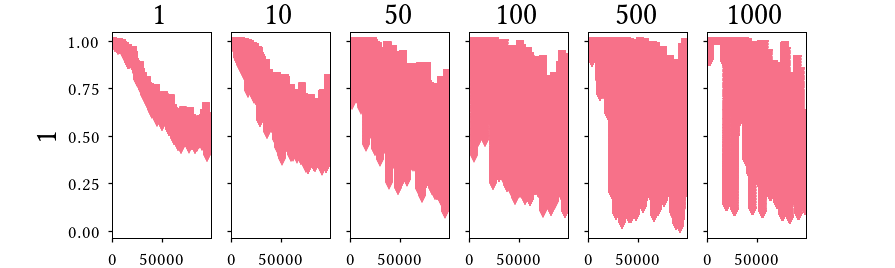

<IPython.core.display.Javascript object>


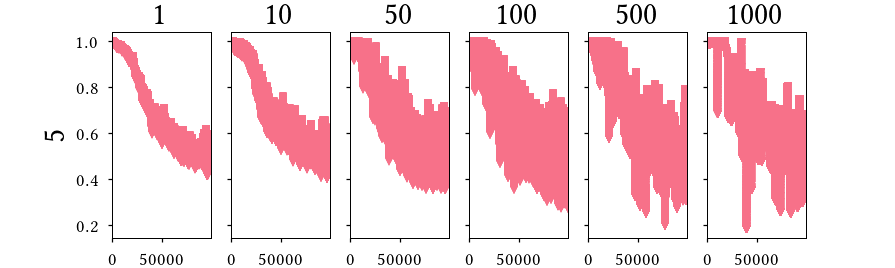

<IPython.core.display.Javascript object>


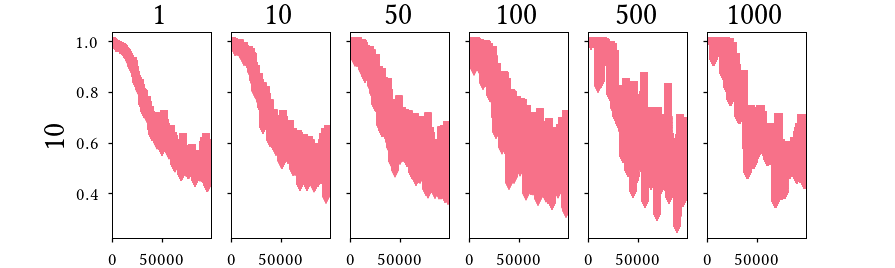

<IPython.core.display.Javascript object>


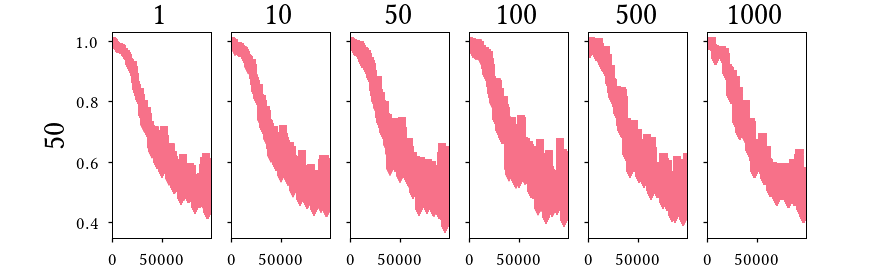

<IPython.core.display.Javascript object>


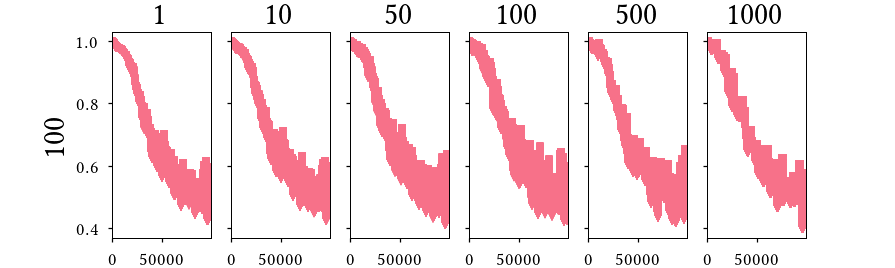

<IPython.core.display.Javascript object>


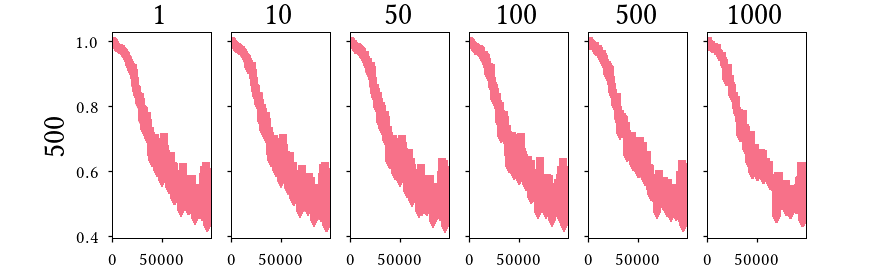

In [10]:
%matplotlib notebook

stream = 1

for niter in sorted(masterdata["niter"].unique()): 
    fig, axes = plt.subplots(nrows=1, ncols=len(masterdata["step"].unique()), figsize=(10,3), sharey=True, sharex=True)
    axess = axes.reshape(-1)
    i=0
    for step in sorted([int(x) for x in masterdata["step"].unique()]): 
        ax = axess[i]
        plt.sca(axess[i])
        subdata = masterdata[(masterdata["niter"] == niter) & (masterdata["step"] == step) & (masterdata["stream"] == stream)]
        path = subdata["path"].values[0]
        f = open(path_to_results + path) 
        l = f.readline()
        values = pd.Series([float(x) for x in l.split(",")])
        values.plot(ax = ax)
        
        if(i == 0):
            plt.ylabel("%s"%(niter))
        plt.title("%s"%step)
            
        i = i + 1

In [16]:
m = masterdata.groupby("path").mean()["cpu"].max()
masterdata["relcpu"] = masterdata["cpu"] /  m

In [17]:
purples5 = sns.color_palette("Purples_r", 5)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 5)

In [18]:
masterdata["niter"].unique()

array([500,   1,   5,  10, 100,  50])

In [19]:
masterdata.head()

,estimatorId,cpu,wall,abserror,absmeansqerror,absspeedup,relerror,relmeansqerror,relspeedup,path,rep,niter,window,step,stream,relcpu
0,MWP-500-0||1000-1-0.99-1,1.540335e+07,1.576674e+07,0.0,0.0,0.0,0.000934,0.000001,1.062882,data/MWP-500-0||1000-1-0.99-1,-34,500,1000,1,1,0.784128
1,MWP-500-0||1000-1-0.99-0,1.637195e+07,1.676177e+07,0.0,0.0,0.0,0.000000,0.000000,1.000000,data/MWP-500-0||1000-1-0.99-0,-34,500,1000,1,0,0.833436
2,MWP-500-0||1000-1-0.99-1,1.575310e+07,1.612729e+07,0.0,0.0,0.0,0.000929,0.000001,1.018035,data/MWP-500-0||1000-1-0.99-1,-2,500,1000,1,1,0.801933
3,MWP-500-0||1000-1-0.99-0,1.603721e+07,1.641674e+07,0.0,0.0,0.0,0.000000,0.000000,1.000000,data/MWP-500-0||1000-1-0.99-0,-2,500,1000,1,0,0.816396
4,MWP-500-0||1000-1-0.99-1,1.620369e+07,1.659002e+07,0.0,0.0,0.0,0.000928,0.000001,0.972451,data/MWP-500-0||1000-1-0.99-1,-50,500,1000,1,1,0.824871


## Figure 9: Quality and speed of contrast estimation with concept drift (* ≡ sweet spot)

<IPython.core.display.Javascript object>


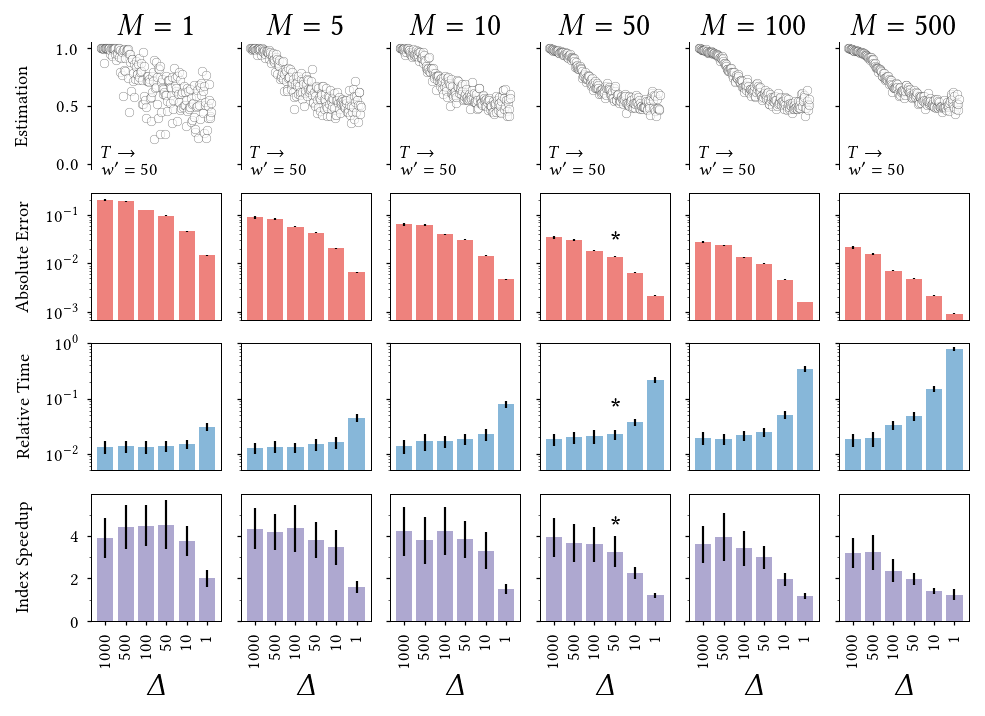

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(11,8), sharey="row", sharex="row")
axess = axes.reshape(-1)
i=0

prettytitle={
    "relcpu": "Relative Time",
    "abserror": "Absolute Error",
    "relspeedup": "Index Speedup"
}

for measure in ["data", "abserror", "relcpu", "relspeedup"]:
    for niter in sorted(masterdata["niter"].unique()): 
        if(measure == "data"):
            subdatastream = masterdata[(masterdata["niter"] == niter) & (masterdata["stream"] == 1)]
            path = subdatastream[subdatastream["step"] == 50]["path"].values[0]
            
            f = open(path_to_results + path)
            slowvalues = pd.Series([float(x) for x in f.readline().split(",")])
                
            plt.sca(axess[i])
            slowvalues = slowvalues[::500]
            plt.scatter(x=slowvalues.index, y=slowvalues, edgecolor='black', color="white", alpha=0.6, rasterized=False)
            plt.ylim((-0.05,1.05))
            
            if(i == 0):
                plt.ylabel("Estimation", fontsize=15, labelpad=20)
            
            axess[i].spines['right'].set_visible(False)
            axess[i].spines['top'].set_visible(False)
            axess[i].spines['bottom'].set_visible(False)
            
            axess[i].xaxis.set_ticks_position('none')
            
            axess[i].text(0,0.05, r'$T \rightarrow  $', fontsize=15)
            axess[i].text(0,-0.1, "$w\'=50$", fontsize=15)
        
            axess[i].set_title("$M = %s$"%niter)
        else:
            subdatastream = masterdata[(masterdata["niter"] == niter) & (masterdata["stream"] == 1)]
            
            cutoffs = subdatastream.groupby("step")[measure].quantile([0.05, 0.95]).unstack(level=1)
            subdatastream = subdatastream.loc[((cutoffs.loc[subdatastream["step"], 0.05] < subdatastream[measure].values) & 
                                   (subdatastream[measure].values < cutoffs.loc[subdatastream["step"], 0.95])).values]

            
            subdatastream = subdatastream.groupby("step").agg(["mean", "std"]).reset_index()
            subdatastream = subdatastream.sort_values("step", ascending=False)

            if(i < 12):
                c = reds5[1]
            elif(i < 18):
                c = blues5[1]
            else:
                c = purples5[1]

            plt.sca(axess[i])
            x_pos = np.arange(len(subdatastream["step"]))
            plt.bar(x_pos, subdatastream[measure]["mean"], yerr=subdatastream[measure]["std"], alpha=0.6, color=c, ecolor='black')
            plt.xticks(x_pos, subdatastream["step"], rotation=90)

            if(measure == "relspeedup"):
                axess[i].set_yticks([0,1,2,3,4,5], ["0","","2","","4"])
            if(measure == "abserror"):
                axess[i].set_yscale("log")

            if(measure == "relcpu"):
                axess[i].set_yscale("log")
                axess[i].set_ylim((0.005, 1))
                axess[i].get_yaxis().set_major_formatter(mpl.ticker.LogFormatterSciNotation())
                axess[i].tick_params(axis='y', which='major')

            if(i % 6 == 0):
                if(measure == "relspeedup"):
                    axess[i].set_ylabel("%s"%prettytitle[measure], fontsize=15, labelpad=30)
                else:
                    axess[i].set_ylabel("%s"%prettytitle[measure], fontsize=15, labelpad=10)
            else:
                axess[i].set_ylabel("")
            if(i < 6):
                axess[i].set_title("$M = %s$"%niter)

            if(niter == 50):
                if(measure == "abserror"):
                    axess[i].text(2.8, 0.03, "*", fontsize=25)
                if(measure == "relcpu"):
                    axess[i].text(2.8, 0.07, "*", fontsize=25)
                if(measure == "relspeedup"):
                    axess[i].text(2.8, 4.5, "*", fontsize=25)


        if(i < 18):
            plt.xticks([])
        else:
            axess[i].set_xlabel("$\mathit{\Delta}$")
        i = i + 1
    
plt.tight_layout()

plt.savefig("plots/Fig9.pdf")